In [1]:
# These are libraries for Model Creation:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision import transforms
import os


In [2]:
class Autoencoder(nn.Module):
        def __init__(self):
            super(Autoencoder, self).__init__()
            # Encoder
            self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 500 -> 250
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 250 -> 125
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),  # Add another layer for a richer encoding
            nn.LeakyReLU(0.2),
        )

            # Decoder
            self.decoder = nn.Sequential(
                nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.LeakyReLU(0.2),
                nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.LeakyReLU(0.2),
                nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
                nn.LeakyReLU(0.2),
                nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),  # No activation function
                nn.Sigmoid()
            )


        def forward(self, x):
            x = self.encoder(x)
            x = self.decoder(x)
            return x

In [ ]:
# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = Autoencoder().to(device)
autoencoder.load_state_dict(torch.load('Data/Output/Models/updated_working_autoencoder_epoch_10.pth', map_location=device))
autoencoder.eval()  # Set model to evaluation mode

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.2)
    (4): C

tensor([[[[0.9490, 0.9922, 0.9804,  ..., 0.1137, 0.1137, 0.1137],
          [0.9647, 0.9843, 0.9686,  ..., 0.1176, 0.1176, 0.1176],
          [0.9804, 0.9725, 0.9647,  ..., 0.1176, 0.1176, 0.1176],
          ...,
          [0.6157, 0.5608, 0.5176,  ..., 0.1843, 0.1922, 0.2000],
          [0.6275, 0.5804, 0.5490,  ..., 0.1922, 0.1961, 0.2000],
          [0.6392, 0.6039, 0.5843,  ..., 0.2039, 0.2000, 0.1922]],

         [[0.9529, 0.9961, 0.9882,  ..., 0.0627, 0.0627, 0.0627],
          [0.9686, 0.9882, 0.9765,  ..., 0.0667, 0.0667, 0.0667],
          [0.9843, 0.9765, 0.9725,  ..., 0.0667, 0.0667, 0.0667],
          ...,
          [0.6157, 0.5608, 0.5176,  ..., 0.1451, 0.1529, 0.1608],
          [0.6275, 0.5804, 0.5490,  ..., 0.1529, 0.1569, 0.1608],
          [0.6392, 0.6039, 0.5843,  ..., 0.1647, 0.1608, 0.1529]],

         [[0.9333, 0.9765, 0.9765,  ..., 0.0314, 0.0314, 0.0314],
          [0.9490, 0.9686, 0.9647,  ..., 0.0353, 0.0353, 0.0353],
          [0.9647, 0.9569, 0.9608,  ..., 0

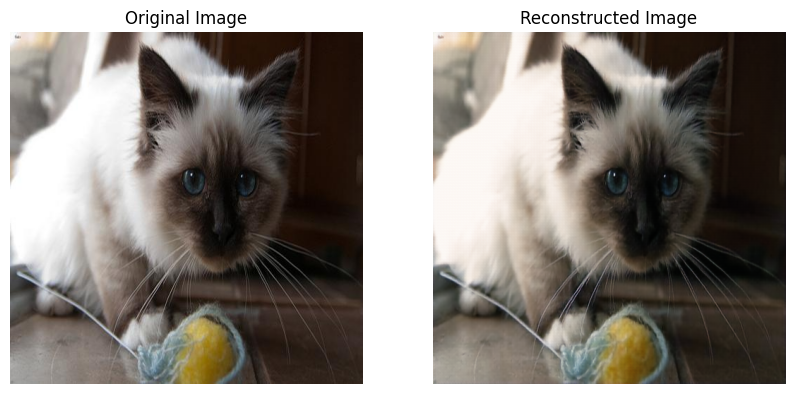

In [4]:
# Define the image path


image_path = "Data/Output/Resized/color/Birman_159.jpg"

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Resize to match model input size
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # If model was trained with normalization
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode
autoencoder.eval()

# Run inference (disable gradient calculations)
with torch.no_grad():
    output_tensor = autoencoder(input_tensor)

# Remove batch dimension and move to CPU
output_tensor = output_tensor.squeeze(0).cpu()
print(input_tensor)
# Convert tensor back to an image
output_image = output_tensor.permute(1, 2, 0)  # Change from (C, H, W) -> (H, W, C)
# output_image = output_image * 0.5 + 0.5  # Undo normalization (if used)

# Clip values to [0,1] to avoid out-of-range issues
output_image = torch.clamp(output_image, 0, 1)

# Display the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(output_image.numpy())  # Convert tensor to NumPy array
ax[1].set_title("Reconstructed Image")
ax[1].axis("off")

plt.show()


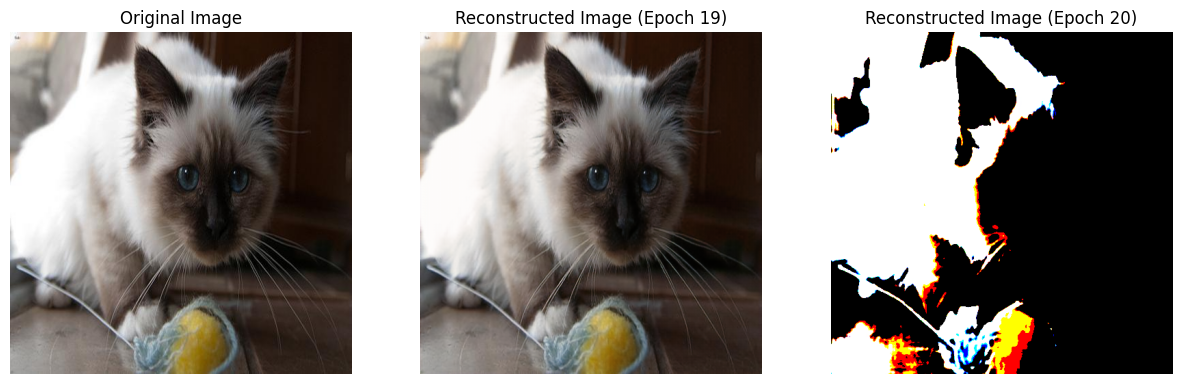

In [5]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define the image path
image_path = "Data/Output/Resized/color/Birman_159.jpg"

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Resize to match model input size
    transforms.ToTensor(),
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Load both models
autoencoder_1 = Autoencoder().to(device)
autoencoder_1.load_state_dict(torch.load('Data/Output/Models/updated_working_autoencoder_epoch_19.pth', map_location=device))
autoencoder_1.eval()

autoencoder_9 = Autoencoder().to(device)
autoencoder_9.load_state_dict(torch.load('Data/Output/Models/updated_working_autoencoder_epoch_20.pth', map_location=device))
autoencoder_9.eval()

# Run inference on both models (disable gradient calculations)
with torch.no_grad():
    output_tensor_1 = autoencoder_1(input_tensor)
    output_tensor_9 = autoencoder_9(input_tensor)

# Remove batch dimension and move to CPU
output_tensor_1 = output_tensor_1.squeeze(0).cpu()
output_tensor_9 = output_tensor_9.squeeze(0).cpu()

# Convert tensors back to images
output_image_1 = output_tensor_1.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
output_image_9 = output_tensor_9.permute(1, 2, 0)

# Clip values to [0,1] to avoid out-of-range issues
output_image_1 = torch.clamp(output_image_1, 0, 1)
output_image_9 = torch.clamp(output_image_9, 0, 1)

# Display the original and reconstructed images from both epochs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(output_image_1.numpy())  # Convert tensor to NumPy array
ax[1].set_title("Reconstructed Image (Epoch 19)")
ax[1].axis("off")

ax[2].imshow(output_image_9.numpy())  # Convert tensor to NumPy array
ax[2].set_title("Reconstructed Image (Epoch 20)")
ax[2].axis("off")

plt.show()

transform = transforms.Compose([
        transforms.Resize((500, 500)),
        transforms.ToTensor(),
#         transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1,1]
    ])

# Load the image
image_path = "Data/Output/Resized/color/Birman_159.jpg"
image = Image.open(image_path).convert('RGB')

# Apply transformations directly
input_tensor = transform(image)  # This will give a tensor of shape (C, H, W)

# Add batch dimension
input_tensor = input_tensor.unsqueeze(0)  # Shape: (1, C, H, W)

In [6]:
# Pass the image through the autoencoder
input_tensor

with torch.no_grad():
    reconstructed_image = autoencoder(input_tensor)

# Convert the output tensor to an image
reconstructed_image = reconstructed_image.squeeze(0).cpu().numpy()  # Remove batch dimension
reconstructed_image = np.transpose(reconstructed_image, (1, 2, 0))  # Convert to (H, W, C)

reconstructed_image


array([[[0.8244357 , 0.849667  , 0.8278182 ],
        [0.91336596, 0.9283959 , 0.89572513],
        [0.89478505, 0.9009675 , 0.85674196],
        ...,
        [0.10301446, 0.0737351 , 0.07688019],
        [0.11890633, 0.09394938, 0.10378721],
        [0.14417034, 0.12454876, 0.13898885]],

       [[0.92229044, 0.9401098 , 0.9115695 ],
        [0.9699892 , 0.97470224, 0.94578445],
        [0.95218825, 0.9565509 , 0.9095322 ],
        ...,
        [0.0734392 , 0.04965791, 0.06054889],
        [0.0702411 , 0.05486805, 0.06568113],
        [0.08500292, 0.06134187, 0.0839707 ]],

       [[0.93621665, 0.94906294, 0.926028  ],
        [0.97173274, 0.9760908 , 0.95066595],
        [0.9616175 , 0.9641595 , 0.9440421 ],
        ...,
        [0.06904962, 0.04521998, 0.04781151],
        [0.06994432, 0.04084934, 0.0520601 ],
        [0.09069485, 0.05447461, 0.06395466]],

       ...,

       [[0.6348479 , 0.6390589 , 0.59536994],
        [0.56934506, 0.56472284, 0.5319367 ],
        [0.5045783 , 0

In [7]:
def preprocess_image(image_path, target_size=(500, 500)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
#     image = image / 255.0 # normalizing to [0, 1]
    return image

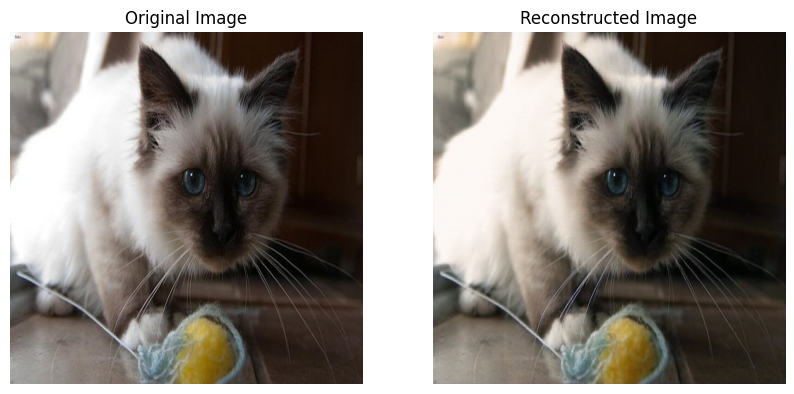

In [8]:
# Convert input image back to numpy for visualization
original_image = input_tensor.squeeze(0).cpu().numpy()
original_image = np.transpose(original_image, (1, 2, 0))

# Plot both images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(reconstructed_image)
axes[1].set_title("Reconstructed Image")
axes[1].axis("off")

plt.show()

In [9]:
class SegmentationDecoder(nn.Module):
    def __init__(self, encoder):
        super(SegmentationDecoder, self).__init__()
        self.encoder = encoder
        for param in self.encoder.parameters():
            param.requires_grad = False  # Freeze encoder
        
        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
            nn.Conv2d(64, 4, kernel_size=3, stride=1, padding=1)  # No activation
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x  # Direct logits output

In [207]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load autoencoder model weights
autoencoder = Autoencoder().to(device)
autoencoder.load_state_dict(torch.load('Data/Output/Models/updated_working_autoencoder_epoch_13.pth', map_location=device))

# Load segmentation model weights
segmentation_model = SegmentationDecoder(autoencoder.encoder).to(device)
segmentation_model.load_state_dict(torch.load('Data/Output/Models/segmentation_model_epoch_2.pth', map_location=device))

segmentation_model.eval()


SegmentationDecoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode='bilinear')
    (1): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Upsample(scale_factor=2.0, mode=

tensor([[[ 1.3019,  2.3422,  2.4868,  ...,  1.8297,  1.5965,  1.0838],
         [ 1.5476,  2.3533,  2.5003,  ...,  2.8861,  2.3531,  1.4352],
         [ 1.9505,  2.7115,  2.8944,  ...,  3.2368,  2.6055,  1.6585],
         ...,
         [ 1.7765,  2.3193,  2.4568,  ...,  1.7681,  1.2067,  0.8564],
         [ 1.5600,  1.9634,  2.0111,  ...,  0.8052,  0.3670,  0.2746],
         [ 1.2570,  1.3632,  1.4983,  ...,  1.0485,  0.8499,  0.6458]],

        [[-1.5522, -1.5856, -1.9659,  ..., -2.7912, -2.2580, -1.5038],
         [-2.4297, -2.6731, -3.0696,  ..., -4.1728, -3.2684, -2.4551],
         [-2.9302, -3.1304, -3.4382,  ..., -4.3138, -3.4231, -2.6017],
         ...,
         [-2.1073, -2.4521, -3.0303,  ..., -3.7877, -3.1506, -2.5915],
         [-2.0852, -2.5831, -3.0599,  ..., -3.4051, -2.8745, -2.2898],
         [-1.4478, -1.9844, -2.2527,  ..., -2.8300, -2.4232, -1.8160]],

        [[-0.5142, -0.9592, -0.8700,  ..., -1.4265, -1.0136, -0.4313],
         [-1.4713, -1.9231, -1.8933,  ..., -2

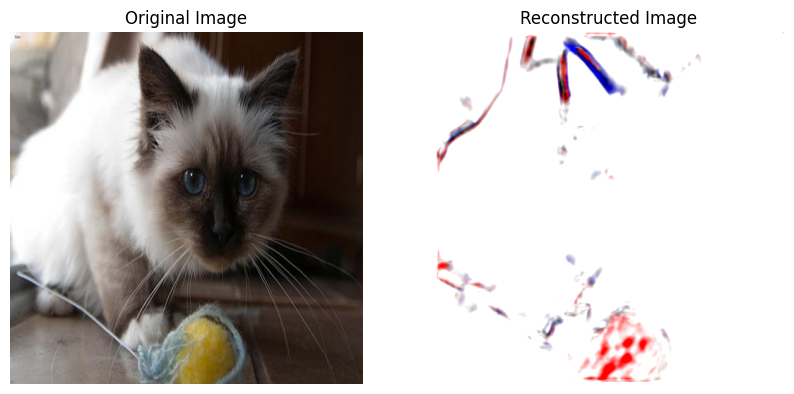

In [208]:
# Define the image path


image_path = "Data/Output/Resized/color/Birman_159.jpg"

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Resize to match model input size
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # If model was trained with normalization
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode


# Run inference (disable gradient calculations)
with torch.no_grad():
    output_tensor = segmentation_model(input_tensor)

# Remove batch dimension and move to CPU
output_tensor = output_tensor.squeeze(0).cpu()
print(output_tensor)
# Convert tensor back to an image



output_image = output_tensor.permute(1, 2, 0)  # Change from (C, H, W) -> (H, W, C)
# output_image = output_image * 0.5 + 0.5  # Undo normalization (if used)

# Clip values to [0,1] to avoid out-of-range issues
output_image = torch.clamp(output_image, 0, 1)

# Display the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(output_image.numpy())  # Convert tensor to NumPy array
ax[1].set_title("Reconstructed Image")
ax[1].axis("off")

plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


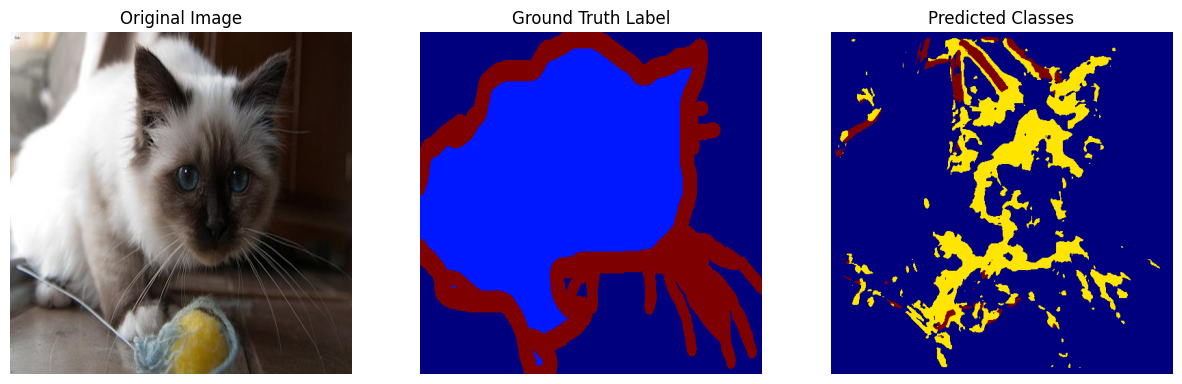

In [209]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Define the image and label paths
image_path = "Data/Output/Resized/color/Birman_159.jpg"
label_path = "Data/Output/Resized/label/Birman_159.png"

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Resize to match model input size
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # If model was trained with normalization
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Load the label image (without transformations, to keep it in its original form)
label = Image.open(label_path).convert('L')  # Load label image in grayscale (L)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode

# Run inference (disable gradient calculations)
with torch.no_grad():
    output_tensor = segmentation_model(input_tensor)

# Apply softmax to convert logits to probabilities
output_tensor = F.softmax(output_tensor, dim=1)  # Apply softmax along the class dimension

# Use argmax to get the most probable class for each pixel (along the class dimension)
predicted_classes = torch.argmax(output_tensor, dim=1)  # Shape: (1, H, W)

# Remove batch dimension and move to CPU
predicted_classes = predicted_classes.squeeze(0).cpu()  # Shape: (H, W)

# Convert tensor back to an image for visualization
output_image = predicted_classes.numpy()  # Convert to NumPy array

# Convert label to NumPy for visualization
label_image = np.array(label)

print(label_image)

# Display the original image, label image, and predicted class images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(label_image, cmap="jet")  # Use a colormap for label visualization
ax[1].set_title("Ground Truth Label")
ax[1].axis("off")

ax[2].imshow(output_image, cmap="jet")  # Use a colormap for predicted classes
ax[2].set_title("Predicted Classes")
ax[2].axis("off")

plt.show()


Selected Image: Data/Output/Resized/color/Birman_159.jpg
Corresponding Label: Data/Output/Resized/label/Birman_159.png


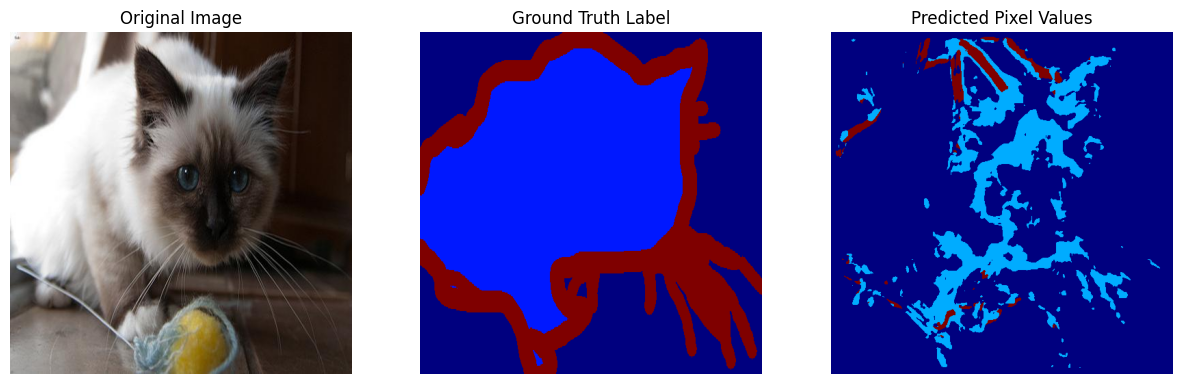

Unique values in label image: [  0  38 255]
Unique values in predicted image: [  0  75 255]


In [210]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision import transforms
import os

image_dir = "Data/Output/Augmented/color/"
label_dir = "Data/Output/Augmented/label/"

# Get list of all images
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select an image
random_image = random.choice(image_files)

# Construct full paths
image_path = os.path.join(image_dir, random_image)
label_path = os.path.join(label_dir, random_image.replace(".jpg", ".png"))

# image_path = "Data/Output/Augmented/color/aug_american_bulldog_146.jpg"
# label_path = "Data/Output/Augmented/label/aug_american_bulldog_146.png"

image_path = "Data/Output/Resized/color/Birman_159.jpg"
label_path = "Data/Output/Resized/label/Birman_159.png"

print("Selected Image:", image_path)
print("Corresponding Label:", label_path)

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Resize to match model input size
    transforms.ToTensor(),
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Load the label image (without transformations, to keep it in its original form)
label = Image.open(label_path).convert('L')  # Load label image in grayscale (L)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode

# Run inference (disable gradient calculations)
with torch.no_grad():
    output_tensor = segmentation_model(input_tensor)

# Apply softmax to convert logits to probabilities
output_tensor = F.softmax(output_tensor, dim=1)  # Apply softmax along the class dimension

# Use argmax to get the most probable class for each pixel (along the class dimension)
predicted_classes = torch.argmax(output_tensor, dim=1)  # Shape: (1, H, W)

# Remove batch dimension and move to CPU
predicted_classes = predicted_classes.squeeze(0).cpu()  # Shape: (H, W)

# Map class indices back to pixel values
class_to_pixel = {0: 0, 1: 38, 2: 75, 3: 255}
output_pixel_values = torch.zeros_like(predicted_classes, dtype=torch.uint8)

# Reverse the class to pixel mapping
for class_idx, pixel_value in class_to_pixel.items():
    output_pixel_values[predicted_classes == class_idx] = pixel_value

# Convert tensors to NumPy arrays for visualization
output_image = output_pixel_values.numpy()
label_image = np.array(label)

# Display the original image, label image, and predicted pixel values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(label_image, cmap="jet")  # Use a colormap for label visualization
ax[1].set_title("Ground Truth Label")
ax[1].axis("off")

ax[2].imshow(output_image, cmap="jet")  # Use a colormap for predicted classes
ax[2].set_title("Predicted Pixel Values")
ax[2].axis("off")

plt.show()

# Print unique values in the label and predicted images""
print("Unique values in label image:", np.unique(label_image))
print("Unique values in predicted image:", np.unique(output_image))


## VIEW PART B

In [3]:
# Residual Block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += residual  # Skip connection
        return self.relu(x)

# Enhanced Segmentation Decoder
class SegmentationDecoder(nn.Module):
    def __init__(self, encoder):
        super(SegmentationDecoder, self).__init__()
        
        # Partially freeze encoder (freeze first few layers, fine-tune deeper ones)
        for param in list(encoder.parameters())[:4]:  # Adjust layers to freeze
            param.requires_grad = False
        
        self.encoder = encoder

        # Decoder with residual blocks and skip connections
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            ResidualBlock(128, 128),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            ResidualBlock(64, 64),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 3, kernel_size=1)  # Output logits
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load autoencoder model weights
autoencoder = Autoencoder().to(device)
autoencoder.load_state_dict(torch.load('Data/Output/Models/updated_working_autoencoder_epoch_30.pth', map_location=device))

# Load segmentation model weights
segmentation_model = SegmentationDecoder(autoencoder.encoder).to(device)
segmentation_model.load_state_dict(torch.load('Data/Output/Models/improved_segmentation_model_epoch_23.pth', map_location=device))
classes = 3


segmentation_model.eval()


SegmentationDecoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ResidualBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running

Selected Image: Data/Output/Augmented/color/aug_1013_aug_Russian_Blue_14.jpg
Corresponding Label: Data/Output/Augmented/label/aug_1013_aug_Russian_Blue_14.png
[0 1 2]


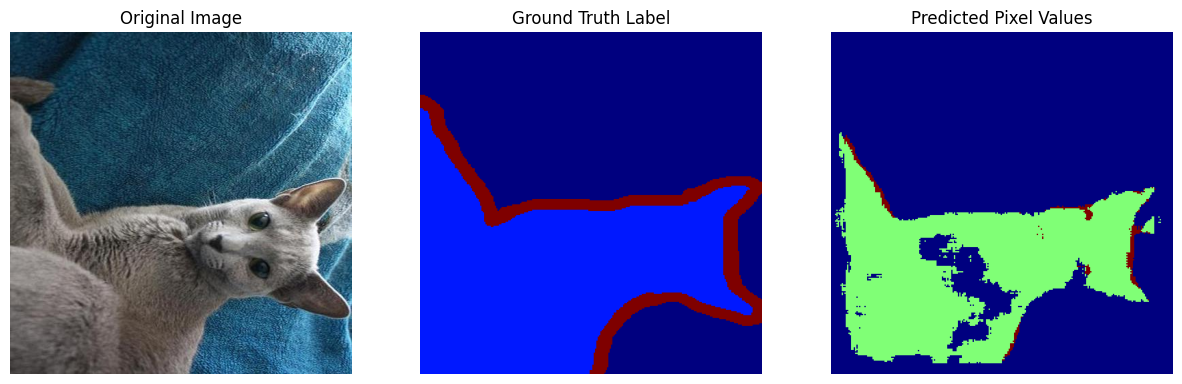

Unique values in label image: [  0  38 255]
Unique values in predicted image: [ 0 38 75]


In [16]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision import transforms
import os

image_dir = "Data/Output/Augmented/color/"
label_dir = "Data/Output/Augmented/label/"

# Get list of all images
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select an image
random_image = random.choice(image_files)

# Construct full paths
image_path = os.path.join(image_dir, random_image)
label_path = os.path.join(label_dir, random_image.replace(".jpg", ".png"))

# image_path = "Data/Output/Augmented/color/aug_american_bulldog_146.jpg"
# label_path = "Data/Output/Augmented/label/aug_american_bulldog_146.png"

# image_path = "Data/Output/Resized/color/Birman_159.jpg"
# label_path = "Data/Output/Resized/label/Birman_159.png"

print("Selected Image:", image_path)
print("Corresponding Label:", label_path)

# Define the same transformations used in training
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size
    transforms.ToTensor(),
])

# Load the image and apply transformations
image = Image.open(image_path).convert('RGB')  # Open image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension: (1, C, H, W)

# Load the label image (without transformations, to keep it in its original form)
label = Image.open(label_path).convert('L')  # Load label image in grayscale (L)
label = label.resize((256, 256), Image.NEAREST)

# Move the tensor to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device)

# Ensure the model is in evaluation mode

# Run inference (disable gradient calculations)
with torch.no_grad():
    output_tensor = segmentation_model(input_tensor)

# Apply softmax to convert logits to probabilities
output_tensor = F.softmax(output_tensor, dim=1)  # Apply softmax along the class dimension

# Use argmax to get the most probable class for each pixel (along the class dimension)
predicted_classes = torch.argmax(output_tensor, dim=1)  # Shape: (1, H, W)
print(np.unique(predicted_classes))
# Remove batch dimension and move to CPU
predicted_classes = predicted_classes.squeeze(0).cpu()  # Shape: (H, W)

# Map class indices back to pixel values
class_to_pixel = {0: 0, 1: 38, 2: 75, 3:255}
output_pixel_values = torch.zeros_like(predicted_classes, dtype=torch.uint8)

# Reverse the class to pixel mapping
for class_idx, pixel_value in class_to_pixel.items():
    output_pixel_values[predicted_classes == class_idx] = pixel_value

# Convert tensors to NumPy arrays for visualization
output_image = output_pixel_values.numpy()
label_image = np.array(label)

# Display the original image, label image, and predicted pixel values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(label_image, cmap="jet")  # Use a colormap for label visualization
ax[1].set_title("Ground Truth Label")
ax[1].axis("off")

ax[2].imshow(output_image, cmap="jet")  # Use a colormap for predicted classes
ax[2].set_title("Predicted Pixel Values")
ax[2].axis("off")

plt.show()

# Print unique values in the label and predicted images""
print("Unique values in label image:", np.unique(label_image))
print("Unique values in predicted image:", np.unique(output_image))


In [40]:
##Selected Image: Data/Output/Augmented/color/aug_British_Shorthair_197.jpg
##Corresponding Label: Data/Output/Augmented/label/aug_British_Shorthair_197.png

In [4]:
import torch
import matplotlib.pyplot as plt

def visualize_prediction(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Get a batch of images and labels
        images, labels = next(iter(dataloader))
        
        # Move to device
        images, labels = images.to(device), labels.to(device)

        # Get model predictions
        outputs = model(images)  # Shape: [batch, num_classes, H, W]
        predictions = torch.argmax(outputs, dim=1)  # Convert logits to class labels

        # Convert tensors to numpy arrays
        image_np = images[0].cpu().permute(1, 2, 0).numpy()  # Convert CHW to HWC
        label_np = labels[0].cpu().numpy()  # Ground truth mask
        pred_np = predictions[0].cpu().numpy()  # Model's predicted mask

        # Plot
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(image_np)
        axes[0].set_title("Input Image")
        
        axes[1].imshow(label_np, cmap="gray")
        axes[1].set_title("Ground Truth Label")
        
        axes[2].imshow(pred_np, cmap="gray")
        axes[2].set_title("Model Prediction")

        for ax in axes:
            ax.axis("off")  # Hide axes
        
        plt.show()


## CLIP VISUALISATION

In [11]:
class SegmentationDecoder(nn.Module):
    def __init__(self, clip_feature_dim=512, num_classes=4):
        super(SegmentationDecoder, self).__init__()

        # Project CLIP features
        self.clip_fc = nn.Linear(clip_feature_dim, 128)  

        # CNN Feature Extractor
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128 + 128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(size=(256, 256), mode='bilinear', align_corners=True),  # Ensure fixed output size
            nn.ConvTranspose2d(64, num_classes, kernel_size=3, stride=1, padding=1),
        )


    def forward(self, image, clip_features):
        cnn_features = self.encoder(image)
        clip_features = self.clip_fc(clip_features).view(clip_features.shape[0], 128, 1, 1)
        clip_features = clip_features.expand(-1, -1, cnn_features.shape[2], cnn_features.shape[3])

        fusion = torch.cat([cnn_features, clip_features], dim=1)
        segmentation_output = self.decoder(fusion)
        return segmentation_output

In [12]:
segmentation_model = SegmentationDecoder().to('cpu')
segmentation_model.load_state_dict(torch.load('Data/Output/Models/clip_segmentation_model_epoch_30.pth', map_location='cpu'))

<All keys matched successfully>

In [13]:
segmentation_model.to('cpu')
segmentation_model.eval()

SegmentationDecoder(
  (clip_fc): Linear(in_features=512, out_features=128, bias=True)
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Upsample(size=(256, 256), mode='bilinear')
    (3): ConvTranspose2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [18]:
import os
import random
device = 'cpu'
clip_feature_path = '/home/s2677266/CVis/Data/Output/Models/clipTrainFeatures/aug_0_aug_Russian_Blue_146.pt'
img_path = '/home/s2677266/CVis/Data/Output/Augmented/color/aug_0_aug_Russian_Blue_146.jpg'

clip_features_dir = "/home/s2677266/CVis/Data/Output/Models/clipTrainFeatures/"
images_dir = "/home/s2677266/CVis/Data/Output/Augmented/color/"

# Get all available feature files
clip_feature_files = [f for f in os.listdir(clip_features_dir) if f.endswith('.pt')]

# Randomly select one
random_clip_feature = random.choice(clip_feature_files)
clip_feature_path = os.path.join(clip_features_dir, random_clip_feature)

# Get corresponding image file (assuming consistent naming)
image_filename = random_clip_feature.replace(".pt", ".jpg")
img_path = os.path.join(images_dir, image_filename)


Output shape: torch.Size([1, 4, 256, 256])


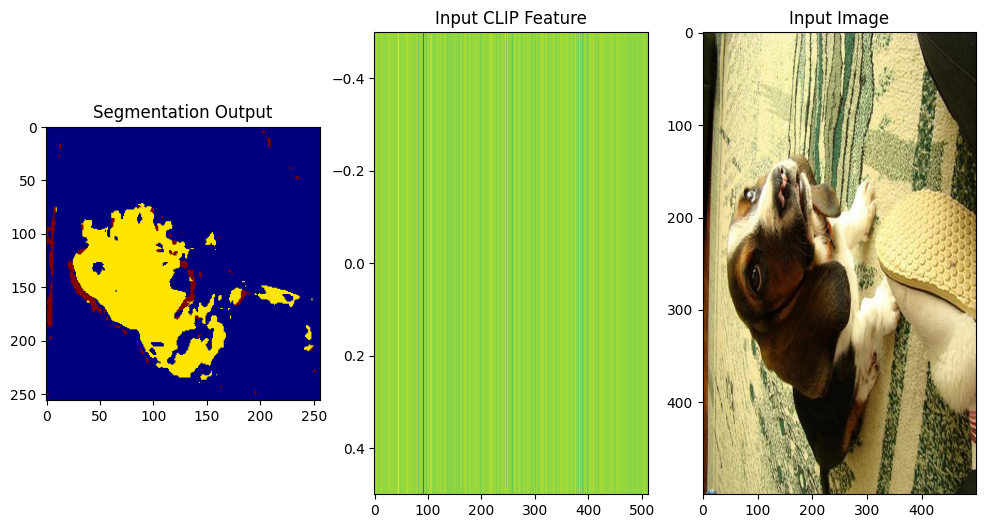

In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Ensure model is on the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CLIP feature
clip_feature = torch.load(clip_feature_path).to(device)

# Load and preprocess the image
imagePic = Image.open(img_path).convert("RGB")
image = transforms.ToTensor()(imagePic).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Ensure CLIP feature is shaped correctly (batch_size, clip_feature_dim)
clip_feature = clip_feature.unsqueeze(0)  # Shape: (1, 512)

# Perform inference with no gradients
with torch.no_grad():
    model_output = segmentation_model(image, clip_feature)  # Output shape: (1, num_classes, H, W)

print(f"Output shape: {model_output.shape}")

# Process the output segmentation mask
segmentation_mask = model_output.squeeze(0)  # Shape: (num_classes, H, W)
segmentation_mask = torch.argmax(segmentation_mask, dim=0).cpu().numpy()  # Convert to numpy

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Show segmentation mask
axes[0].imshow(segmentation_mask, cmap='jet')
axes[0].set_title("Segmentation Output")

# Show input CLIP feature vector as a heatmap
axes[1].imshow(clip_feature.squeeze(0).cpu().numpy().reshape(1, -1), aspect="auto", cmap='viridis')
axes[1].set_title("Input CLIP Feature")

axes[2].imshow(imagePic, aspect="auto", cmap='viridis')
axes[2].set_title("Input Image")

plt.show()


Selected Image: Data/Output/Augmented/color/aug_947_aug_Abyssinian_103.jpg
Corresponding Label: Data/Output/Augmented/label/aug_947_aug_Abyssinian_103.png


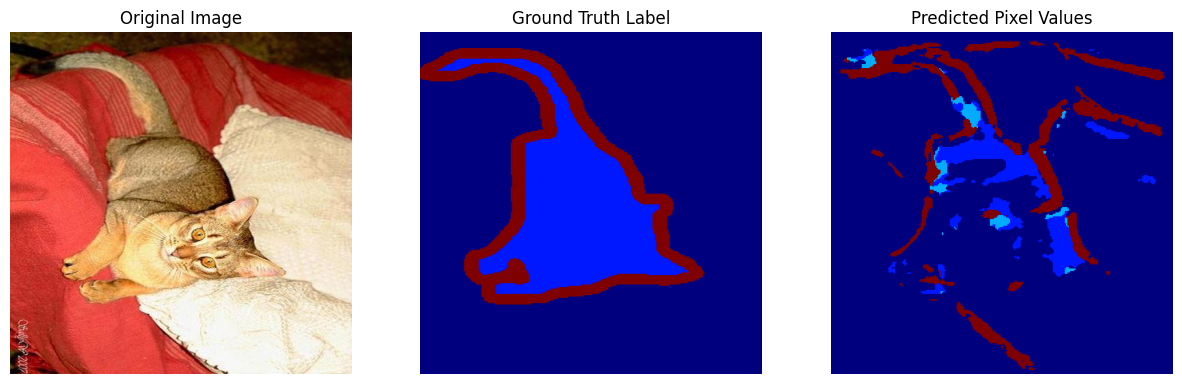

IoU per class: [0.7573827839760898, 0.0, nan, 0.0]
Mean IoU: 0.25246092799202996


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size
    transforms.ToTensor(),
])

def load_image_and_label(image_path, label_path):
    """Load an image and its corresponding label, apply necessary transformations."""
    image = Image.open(image_path).convert('RGB')
    label = Image.open(label_path).convert('L')  # Load label in grayscale
    label = label.resize((256, 256), Image.NEAREST)

    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    label_array = np.array(label)  # Convert label to numpy array

    return input_tensor, label_array, image

def compute_iou(pred, target, num_classes=4):
    """
    Compute the Intersection over Union (IoU) score for multi-class segmentation.
    
    :param pred: Predicted segmentation map (H, W), with class indices.
    :param target: Ground truth segmentation map (H, W), with class indices.
    :param num_classes: Number of classes in segmentation.
    :return: IoU score for each class and mean IoU.
    """
    iou_per_class = []
    
    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        
        intersection = torch.logical_and(pred_inds, target_inds).sum().item()
        union = torch.logical_or(pred_inds, target_inds).sum().item()

        if union == 0:
            iou_per_class.append(float('nan'))  # Ignore classes not present in the image
        else:
            iou_per_class.append(intersection / union)

    mean_iou = np.nanmean(iou_per_class)  # Compute mean IoU ignoring NaNs
    return iou_per_class, mean_iou

# Define file paths
image_dir = "Data/Input/Test/color/"
label_dir = "Data/Input/Test/label/"

# Get list of all images
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select an image
random_image = random.choice(image_files)

# Construct full paths
image_path = os.path.join(image_dir, random_image)
label_path = os.path.join(label_dir, random_image.replace(".jpg", ".png"))

print("Selected Image:", image_path)
print("Corresponding Label:", label_path)

# Load image and label
input_tensor, label_image, raw_image = load_image_and_label(image_path, label_path)

# Run inference
segmentation_model.eval()
with torch.no_grad():
    output_tensor = segmentation_model(input_tensor)

# Apply softmax and get predicted class indices
output_tensor = F.softmax(output_tensor, dim=1)
predicted_classes = torch.argmax(output_tensor, dim=1).squeeze(0).cpu()  # (H, W)

# Map class indices back to pixel values
class_to_pixel = {0: 0, 1: 38, 2: 75, 3: 255}
pixel_to_class = {v: k for k, v in class_to_pixel.items()}

output_pixel_values = torch.zeros_like(predicted_classes, dtype=torch.uint8)
for class_idx, pixel_value in class_to_pixel.items():
    output_pixel_values[predicted_classes == class_idx] = pixel_value

# Convert label image to class indices
label_tensor = torch.tensor(label_image, dtype=torch.uint8)
label_class_map = torch.zeros_like(label_tensor)

for pixel_value, class_idx in pixel_to_class.items():
    label_class_map[label_tensor == pixel_value] = class_idx

# Compute IoU
iou_per_class, mean_iou = compute_iou(output_pixel_values, label_class_map)

# Convert tensors to NumPy arrays for visualization
output_image = output_pixel_values.numpy()

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(raw_image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(label_image, cmap="jet")  
ax[1].set_title("Ground Truth Label")
ax[1].axis("off")

ax[2].imshow(output_image, cmap="jet")  
ax[2].set_title("Predicted Pixel Values")
ax[2].axis("off")

plt.show()

print("IoU per class:", iou_per_class)
print("Mean IoU:", mean_iou)


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm  # Progress bar for better visibility

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size
    transforms.ToTensor(),
])

def load_image_and_label(image_path, label_path):
    """Load an image and its corresponding label, apply necessary transformations."""
    image = Image.open(image_path).convert('RGB')
    label = Image.open(label_path).convert('L')  # Load label in grayscale
    label = label.resize((256, 256), Image.NEAREST)

    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    label_array = np.array(label)  # Convert label to numpy array

    return input_tensor, label_array

def compute_iou(pred, target, num_classes=4):
    """
    Compute the Intersection over Union (IoU) score for multi-class segmentation.
    
    :param pred: Predicted segmentation map (H, W), with class indices.
    :param target: Ground truth segmentation map (H, W), with class indices.
    :param num_classes: Number of classes in segmentation.
    :return: IoU scores per class and mean IoU.
    """
    iou_per_class = []
    
    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        
        intersection = torch.logical_and(pred_inds, target_inds).sum().item()
        union = torch.logical_or(pred_inds, target_inds).sum().item()

        if union == 0:
            iou_per_class.append(float('nan'))  # Ignore classes not present in the image
        else:
            iou_per_class.append(intersection / union)

    mean_iou = np.nanmean(iou_per_class)  # Compute mean IoU ignoring NaNs
    return iou_per_class, mean_iou

# Define file paths
image_dir = "Data/Input/Test/color/"
label_dir = "Data/Input/Test/label/"

# Get list of all images
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Mapping between class indices and pixel values
class_to_pixel = {0: 0, 1: 38, 2: 75, 3: 255}
pixel_to_class = {v: k for k, v in class_to_pixel.items()}

# Store IoU results
all_ious = []

# Set model to evaluation mode
segmentation_model.eval()

# Loop through all images
for image_file in tqdm(image_files, desc="Processing images"):
    # Construct full paths
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace(".jpg", ".png"))

    # Load image and label
    input_tensor, label_image = load_image_and_label(image_path, label_path)

    # Run inference
    with torch.no_grad():
        output_tensor = segmentation_model(input_tensor)

    # Apply softmax and get predicted class indices
    output_tensor = F.softmax(output_tensor, dim=1)
    predicted_classes = torch.argmax(output_tensor, dim=1).squeeze(0).cpu()  # (H, W)

    # Convert predicted class indices to pixel values
    output_pixel_values = torch.zeros_like(predicted_classes, dtype=torch.uint8)
    for class_idx, pixel_value in class_to_pixel.items():
        output_pixel_values[predicted_classes == class_idx] = pixel_value

    # Convert label image to class indices
    label_tensor = torch.tensor(label_image, dtype=torch.uint8)
    label_class_map = torch.zeros_like(label_tensor)

    for pixel_value, class_idx in pixel_to_class.items():
        label_class_map[label_tensor == pixel_value] = class_idx

    # Compute IoU
    _, mean_iou = compute_iou(output_pixel_values, label_class_map)
    all_ious.append(mean_iou)

# Compute overall mean IoU
overall_mean_iou = np.nanmean(all_ious)

print(f"Overall Mean IoU: {overall_mean_iou:.4f}")


Processing images: 100%|██████████| 4868/4868 [27:50<00:00,  2.91it/s]  

Overall Mean IoU: 0.2306


## CLip IOU

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm  # Progress bar for better visibility
import open_clip  # For CLIP model

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CLIP model and tokenizer
clip_model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms("ViT-B-32", pretrained="openai")
clip_model = clip_model.to(device)
tokenizer = open_clip.get_tokenizer("ViT-B-32")

# Define the segmentation model
class SegmentationDecoder(nn.Module):
    def __init__(self, clip_feature_dim=512, num_classes=4):
        super(SegmentationDecoder, self).__init__()

        # Project CLIP features
        self.clip_fc = nn.Linear(clip_feature_dim, 128)

        # CNN Feature Extractor
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128 + 128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Upsample(size=(256, 256), mode='bilinear', align_corners=True),  # Ensure fixed output size
            nn.ConvTranspose2d(64, num_classes, kernel_size=3, stride=1, padding=1),
        )

    def forward(self, image, clip_features):
        cnn_features = self.encoder(image)
        clip_features = self.clip_fc(clip_features).view(clip_features.shape[0], 128, 1, 1)
        clip_features = clip_features.expand(-1, -1, cnn_features.shape[2], cnn_features.shape[3])

        fusion = torch.cat([cnn_features, clip_features], dim=1)
        segmentation_output = self.decoder(fusion)
        return segmentation_output

# Load the trained segmentation model at epoch 30
segmentation_model = SegmentationDecoder().to(device)
segmentation_model.load_state_dict(torch.load('Data/Output/Models/clip_segmentation_model_epoch_30.pth', map_location=device))
segmentation_model.eval()

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size
    transforms.ToTensor(),
])

def load_image_and_label(image_path, label_path):
    """Load an image and its corresponding label, apply necessary transformations."""
    image = Image.open(image_path).convert('RGB')
    label = Image.open(label_path).convert('L')  # Load label in grayscale
    label = label.resize((256, 256), Image.NEAREST)

    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    label_array = np.array(label)  # Convert label to numpy array

    return input_tensor, label_array

def compute_iou(pred, target, num_classes=4):
    """
    Compute the Intersection over Union (IoU) score for multi-class segmentation.
    
    :param pred: Predicted segmentation map (H, W), with class indices.
    :param target: Ground truth segmentation map (H, W), with class indices.
    :param num_classes: Number of classes in segmentation.
    :return: IoU scores per class and mean IoU.
    """
    iou_per_class = []
    
    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        
        intersection = torch.logical_and(pred_inds, target_inds).sum().item()
        union = torch.logical_or(pred_inds, target_inds).sum().item()

        if union == 0:
            iou_per_class.append(float('nan'))  # Ignore classes not present in the image
        else:
            iou_per_class.append(intersection / union)

    mean_iou = np.nanmean(iou_per_class)  # Compute mean IoU ignoring NaNs
    return iou_per_class, mean_iou

# Define file paths
image_dir = "Data/Input/Test/color/"
label_dir = "Data/Input/Test/label/"

# Get list of all images
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

# Mapping between class indices and pixel values
class_to_pixel = {0: 0, 1: 38, 2: 75, 3: 255}
pixel_to_class = {v: k for k, v in class_to_pixel.items()}

# Store IoU results
all_ious = []

# Process each image
for image_file in tqdm(image_files, desc="Processing images"):
    # Construct full paths
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, image_file.replace(".jpg", ".png"))

    # Load image and label
    input_tensor, label_image = load_image_and_label(image_path, label_path)

    # Generate CLIP features
    with torch.no_grad():
        clip_features = clip_model.encode_image(input_tensor)  # Extract CLIP features

    # Run segmentation model
    with torch.no_grad():
        output_tensor = segmentation_model(input_tensor, clip_features)

    # Apply softmax and get predicted class indices
    output_tensor = F.softmax(output_tensor, dim=1)
    predicted_classes = torch.argmax(output_tensor, dim=1).squeeze(0).cpu()  # (H, W)

    # Convert predicted class indices to pixel values
    output_pixel_values = torch.zeros_like(predicted_classes, dtype=torch.uint8)
    for class_idx, pixel_value in class_to_pixel.items():
        output_pixel_values[predicted_classes == class_idx] = pixel_value

    # Convert label image to class indices
    label_tensor = torch.tensor(label_image, dtype=torch.uint8)
    label_class_map = torch.zeros_like(label_tensor)

    for pixel_value, class_idx in pixel_to_class.items():
        label_class_map[label_tensor == pixel_value] = class_idx

    # Compute IoU
    _, mean_iou = compute_iou(predicted_classes, label_class_map)
    all_ious.append(mean_iou)

# Compute overall mean IoU
overall_mean_iou = np.nanmean(all_ious)

print(f"Overall Mean IoU: {overall_mean_iou:.4f}")


/home/s2677266/miniconda3/envs/mlsys/lib/python3.10/site-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(
Processing images:   0%|          | 0/3710 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (65) must match the size of tensor b (50) at non-singleton dimension 1

In [ ]:
clip_feature = torch.load(clip_feature_path).to(device)
image = Image.open(img_path).convert("RGB")
image = transforms.ToTensor()(image)
# Ensure that the clip_feature is in the expected shape for the model (batch_size, clip_feature_dim)
# Since clip feature is (512,), we need to add a batch dimension
clip_feature = clip_feature.unsqueeze(0)  # Shape should now be (1, 512)

# Pass the clip feature through the model to get the output (segmentation mask)
with torch.no_grad():  # Inference, no gradients needed
    model_output = segmentation_model(image, clip_feature)

# model_output will be in shape (1, num_classes, height, width), let's check its shape
print(f"Output shape: {model_output.shape}")

# We will visualize the output segmentation mask (taking the first image of the batch)
segmentation_mask = model_output.squeeze(0)  # Shape should be (num_classes, height, width)

# Let's get the class with the highest probability for each pixel
segmentation_mask = torch.argmax(segmentation_mask, dim=0)  # Shape will be (height, width)

# Convert to numpy for visualization
segmentation_mask = segmentation_mask.cpu().numpy()

# Plot the original clip feature (you may want to visualize it, too)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the segmentation mask
axes[0].imshow(segmentation_mask, cmap='jet')
axes[0].set_title("Segmentation Output")

# Visualize the input clip feature (just the raw vector as a heatmap)
axes[1].imshow(clip_feature.squeeze(0).cpu().numpy().reshape(1, -1), aspect="auto", cmap='viridis')
axes[1].set_title("Input CLIP Feature")

plt.show()

### U NET

In [7]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
img_path = "/home/s2677266/CVis/Data/Output/Augmented/color/aug_0_aug_Russian_Blue_146.jpg"  # Replace with an actual image filename

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class UNet(nn.Module):
    def __init__(self, num_classes=4):
        super(UNet, self).__init__()

        # Encoder
        self.enc1 = self.conv_block(3, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = self.conv_block(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = self.conv_block(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = self.conv_block(256, 512)

        # Decoder
        self.up5 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec5 = self.conv_block(512, 256)

        self.up6 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec6 = self.conv_block(256, 128)

        self.up7 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec7 = self.conv_block(128, 64)

        # Final output layer
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        c1 = self.enc1(x)
        p1 = self.pool1(c1)

        c2 = self.enc2(p1)
        p2 = self.pool2(c2)

        c3 = self.enc3(p2)
        p3 = self.pool3(c3)

        c4 = self.enc4(p3)

        # Decoder
        u5 = self.up5(c4)
        u5 = torch.cat([u5, c3], dim=1)
        c5 = self.dec5(u5)

        u6 = self.up6(c5)
        u6 = torch.cat([u6, c2], dim=1)
        c6 = self.dec6(u6)

        u7 = self.up7(c6)
        u7 = torch.cat([u7, c1], dim=1)
        c7 = self.dec7(u7)

        outputs = self.final_conv(c7)

        return outputs
    
device = 'cpu'

model = UNet().to(device)
model.load_state_dict(torch.load('Data/Output/Models/unet_model_epoch_7.pth', map_location=device))

model.eval()


UNet(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc4): Sequential(
    (0): Con

In [8]:
# Define transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match training input
    transforms.ToTensor()
])

# Load and preprocess the image
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension


In [9]:
# Get the model's prediction
with torch.no_grad():
    output = model(input_tensor)  # Output shape: (1, num_classes, H, W)

print(output.shape)
# Convert output to a segmentation mask
output_tensor = F.softmax(output, dim=1)
pred_mask = torch.argmax(output_tensor, dim=1).squeeze().cpu().numpy()  # Get class with highest probability
pred_mask


torch.Size([1, 4, 256, 256])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

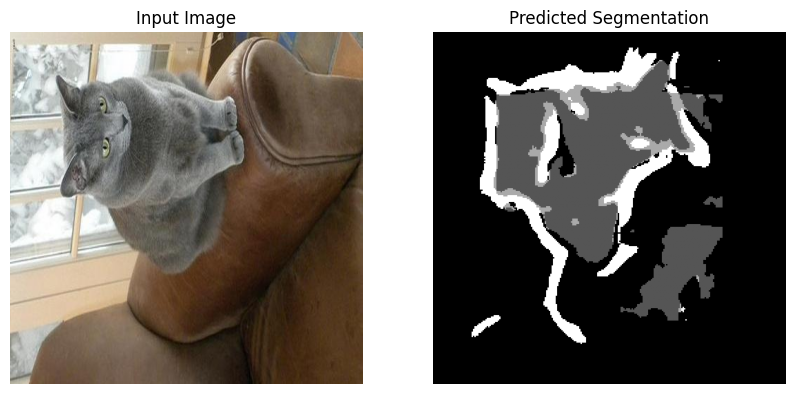

In [10]:
# Display input and output side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Input Image")
ax[0].axis("off")

ax[1].imshow(pred_mask, cmap="gray")  # Change cmap if needed
ax[1].set_title("Predicted Segmentation")
ax[1].axis("off")

plt.show()

